# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 10
my_eth = 5

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# formating
btc_url = btc_url + "?format=jason"
eth_url = eth_url + "?format=jason"

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
request_btc= requests.get(btc_url)
request_btc_content= request_btc.content
btc_data= request_btc.json()
btc_data
btc_price= btc_data['data']['1']['quotes']['USD']['price']
print(f"Bitcoin Price is: ${btc_price}")

# Fetch current ETH price
# YOUR CODE HERE!]
request_eth= requests.get(eth_url)
request_eth_content= request_eth.content
eth_data = request_eth.json()
eth_data
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
print(f"Ehtereum price is; ${eth_price}")

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value= btc_price*my_btc
my_eth_value= eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

Bitcoin Price is: $42088.0
Ehtereum price is; $2838.84
The current value of your 10 BTC is $420880.00
The current value of your 5 ETH is $14194.20


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
# YOUR CODE HERE!
num_of_spy= 50
num_of_agg= 200

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [16]:
# Format current date as ISO format
# YOUR CODE HERE!
#not today but the current most up to date
current_date = pd.Timestamp("2021-09-24", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=current_date,
    end=current_date,
).df

# Preview DataFrame
# YOUR CODE HERE!
df_ticker.head()

AGG                                         SPY  \
                            open      high      low   close   volume    open   
time                                                                           
2021-09-24 00:00:00-04:00  115.5  115.5055  115.319  115.41  3388185  441.44   

                                                             
                             high     low   close    volume  
time                                                         
2021-09-24 00:00:00-04:00  444.67  441.21  443.92  52199034

In [17]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_ticker["AGG"]["close"].item()
spy_close_price = df_ticker["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.41
Current SPY closing price: $443.92


In [19]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value= agg_close_price*num_of_agg
my_spy_value= spy_close_price*num_of_spy

# Print current value of share
print(f"The current value of your {agg_close_price} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {spy_close_price} AGG shares is ${my_agg_value:0.2f}")

The current value of your 115.41 SPY shares is $22196.00
The current value of your 443.92 AGG shares is $23082.00


### Savings Health Analysis

In [20]:
# Set monthly household income
# YOUR CODE HERE!
House_hold_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = {'savings':[my_btc_value+my_eth_value, my_spy_value+my_agg_value]}
df_savings = pd.DataFrame(df_savings,index= ['Crypto','Shares'])

# Display savings DataFrame
display(df_savings)

,savings
Crypto,435074.2
Shares,45278.0


<AxesSubplot:ylabel='savings'>

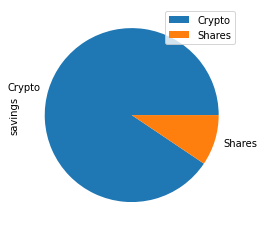

In [21]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind='pie', y= 'savings')

In [23]:
# Set ideal emergency fund
emergency_fund = House_hold_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_amnt_savings= df_savings.sum().item()

# Validate saving health
# YOUR CODE HERE!
if total_amnt_savings > emergency_fund: 
    print(f"Congratulation, you have gained more than 3x gains off of your investment")
elif total_amnt_savings == emergency_fund:
    print(f"Congratulation, you have equalled the target goal of 3x gains od of you investment")
else:
    print(f"You are ${emergency_fund-total_amnt_savings} short from 3x gains off of your investment")

Congratulation, you have gained more than 3x gains off of your investment


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [25]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
start_date = pd.Timestamp('2016-05-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-24', tz='America/New_York').isoformat()

df_ticker_new = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_ticker_new.head(3)

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2021-05-05 00:00:00-04:00  114.45  114.62  114.4222  114.610  3861137  417.38   
2021-05-06 00:00:00-04:00  114.55  114.71  114.5300  114.650  4557111  415.83   
2021-05-07 00:00:00-04:00  114.85  114.97  114.5700  114.645  6812067  419.89   

                                                               
                              high      low   close    volume  
time                                                           
2021-05-05 00:00:00-04:00  417.630  414.940  415.72  51316402  
2021-05-06 00:00:00-04:00  419.210  413.675  419.08  65397203  
2021-05-07 00:00:00-04:00  422.815  419.160  422.09  58000019

In [26]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year = MCSimulation(
    portfolio_data = df_ticker_new,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [27]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty_year.portfolio_data.head(5)

AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2021-05-05 00:00:00-04:00  114.45  114.62  114.4222  114.610  3861137   
2021-05-06 00:00:00-04:00  114.55  114.71  114.5300  114.650  4557111   
2021-05-07 00:00:00-04:00  114.85  114.97  114.5700  114.645  6812067   
2021-05-10 00:00:00-04:00  114.61  114.72  114.4000  114.430  4737895   
2021-05-11 00:00:00-04:00  114.23  114.38  114.1300  114.190  5986487   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2021-05-05 00:00:00-04:00          NaN  417.38  417.630  414.940  415.72   
2021-05-06 00:00:00-04:00     0.000349  415.83  419.210  413.675  419.08   
2021-05-07 00:00:00-04:00    -0.000044  419.89  422.815  419.160  422.09   
2021-05-10 00:00:00-04:00    -0.001875  422.50  422.740  417.810  417.98   
2021-05-11 00:00:00-04:00    -0.002097  413.10  415.270  410.060  414.27   

                                                   
                              volume daily_return  
time                                               
2021-05-05 00:00:00-04:00   51316402          NaN  
2021-05-06 00:00:00-04:00   65397203     0.008082  
2021-05-07 00:00:00-04:00   58000019     0.007182  
2021-05-10 00:00:00-04:00   72071656    -0.009737  
2021-05-11 00:00:00-04:00  105794428    -0.008876

In [28]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\chris\Desktop\Fintech\HW_5\gwu-virt-fin-pt-04-2021-u-c-master-02-Homework-05-APIs-Instructions-Starter_Code\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994218,0.996024,1.003477,0.999295,1.000154,0.998063,1.002039,1.002767,0.998927,0.998629,...,1.001598,0.997327,0.994566,1.001834,0.998147,0.999025,0.996881,0.997906,1.002110,1.001247
2,0.998535,0.995888,1.003015,1.001565,1.000459,0.995670,1.002469,0.997784,0.996645,0.996319,...,1.004202,0.991809,0.993461,1.005585,0.997758,0.995445,0.995085,1.001749,1.008930,0.997989
3,0.993359,1.001661,1.007017,1.003113,1.004505,1.000504,1.006249,1.003857,1.002718,0.989528,...,1.000605,0.991328,0.993800,1.005587,0.998555,0.996149,1.000391,1.003247,1.010888,1.001622
4,0.991515,0.998677,1.010157,1.003111,1.007082,1.000647,1.006342,1.001283,1.003649,0.991297,...,0.994370,0.995322,0.996462,1.002807,0.995609,0.992607,1.003067,1.004994,1.005687,1.000828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.381229,10.447062,13.701673,8.826116,9.031285,10.074781,13.847512,12.678085,14.487111,8.875117,...,13.651148,11.505707,14.001533,6.698585,12.136303,10.349828,12.201888,9.228768,5.858595,17.250198
7557,11.370803,10.442150,13.733031,8.821605,9.037698,10.046646,13.828127,12.732220,14.492865,8.896568,...,13.570369,11.505616,14.034172,6.677160,12.171221,10.346996,12.175378,9.188925,5.850160,17.236435
7558,11.347127,10.452881,13.718902,8.810945,9.008664,10.005879,13.861091,12.737429,14.559039,8.864418,...,13.567541,11.555672,14.006286,6.698787,12.253764,10.362453,12.155517,9.189510,5.836407,17.306825
7559,11.371131,10.404499,13.717099,8.831889,9.007481,10.012044,13.844635,12.726284,14.579003,8.897003,...,13.647029,11.577697,14.023465,6.651403,12.293685,10.365976,12.170665,9.209635,5.829800,17.299214


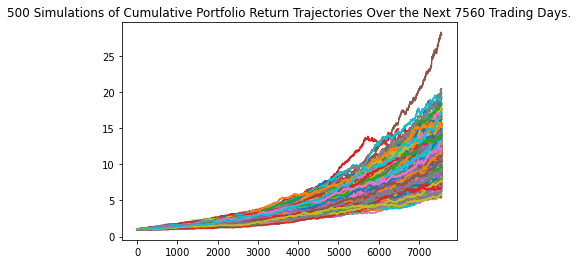

In [29]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirty_year.plot_simulation()

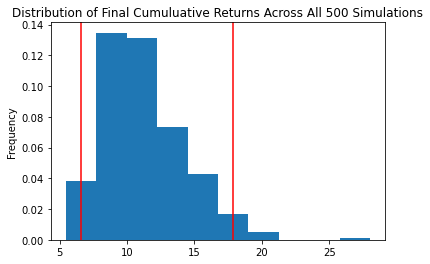

In [31]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats= MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(stats)

count           500.000000
mean             11.181939
std               3.020826
min               5.458740
25%               8.904453
50%              10.730092
75%              12.811454
max              28.031905
95% CI Lower      6.603981
95% CI Upper     17.834401
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [33]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(stats[8]*initial_investment,2)
ci_upper = round(stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $132079.63 and $356688.03


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [34]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(stats[8]*initial_investment,2)
ci_upper = round(stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $198119.44 and $535032.04


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year = MCSimulation(
    portfolio_data = df_ticker_new,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_five_year.portfolio_data.head(5)


AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2021-05-05 00:00:00-04:00  114.45  114.62  114.4222  114.610  3861137   
2021-05-06 00:00:00-04:00  114.55  114.71  114.5300  114.650  4557111   
2021-05-07 00:00:00-04:00  114.85  114.97  114.5700  114.645  6812067   
2021-05-10 00:00:00-04:00  114.61  114.72  114.4000  114.430  4737895   
2021-05-11 00:00:00-04:00  114.23  114.38  114.1300  114.190  5986487   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2021-05-05 00:00:00-04:00          NaN  417.38  417.630  414.940  415.72   
2021-05-06 00:00:00-04:00     0.000349  415.83  419.210  413.675  419.08   
2021-05-07 00:00:00-04:00    -0.000044  419.89  422.815  419.160  422.09   
2021-05-10 00:00:00-04:00    -0.001875  422.50  422.740  417.810  417.98   
2021-05-11 00:00:00-04:00    -0.002097  413.10  415.270  410.060  414.27   

                                                   
                              volume daily_return  
time                                               
2021-05-05 00:00:00-04:00   51316402          NaN  
2021-05-06 00:00:00-04:00   65397203     0.008082  
2021-05-07 00:00:00-04:00   58000019     0.007182  
2021-05-10 00:00:00-04:00   72071656    -0.009737  
2021-05-11 00:00:00-04:00  105794428    -0.008876

In [36]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\chris\Desktop\Fintech\HW_5\gwu-virt-fin-pt-04-2021-u-c-master-02-Homework-05-APIs-Instructions-Starter_Code\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005404,0.995359,0.996956,1.002077,0.992564,0.999499,1.001738,0.998741,1.000761,1.003616,...,1.007426,1.000839,1.001169,0.998906,1.001287,0.999270,0.996949,0.998095,0.997822,0.997950
2,1.003795,0.995905,0.997719,0.996996,0.991254,1.000412,0.999699,0.995745,1.001529,1.005098,...,1.006290,1.004351,1.008340,0.999843,1.001465,0.995604,1.000278,0.999897,1.000115,0.998804
3,1.000934,0.995767,0.999711,0.999138,0.991510,0.997872,1.005028,0.995812,0.997692,1.004071,...,1.007785,1.001887,1.011958,1.000417,1.000031,0.991931,0.999880,1.003462,0.995513,0.996342
4,1.000891,0.995027,1.002164,0.997500,0.993959,1.001191,1.008415,0.990674,0.998564,1.004728,...,1.006004,1.004967,1.014882,1.003135,0.997120,0.987584,1.003977,1.001476,0.992007,0.995657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.654205,1.250995,1.658278,1.387961,1.623402,1.422957,1.306314,1.276451,1.646938,1.604332,...,1.531717,1.435234,1.821583,1.683035,1.617764,1.189440,1.482174,1.221511,1.606799,1.434418
1257,1.644497,1.246580,1.664680,1.386230,1.628230,1.424048,1.306712,1.279309,1.649441,1.607315,...,1.531770,1.432331,1.812536,1.679982,1.625421,1.180250,1.478609,1.224022,1.602475,1.439348
1258,1.651790,1.249464,1.666795,1.388847,1.623919,1.431213,1.315660,1.279198,1.655646,1.608739,...,1.534075,1.433671,1.820776,1.674134,1.624278,1.176132,1.482615,1.226443,1.604800,1.443940
1259,1.652842,1.255007,1.666050,1.386250,1.622035,1.427884,1.319247,1.285727,1.657285,1.606542,...,1.533551,1.436695,1.818338,1.660746,1.631712,1.170377,1.483576,1.230286,1.607113,1.434895


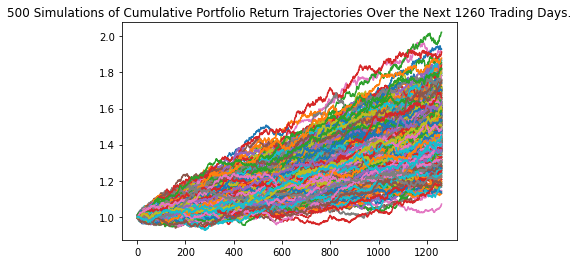

In [37]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_5 = MC_five_year.plot_simulation()

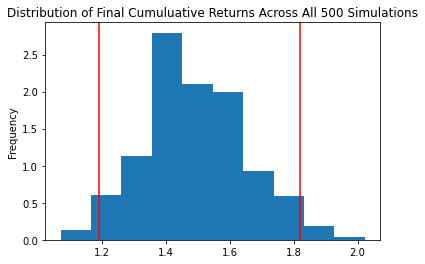

In [42]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_5 = MC_five_year.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats_5= MC_five_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(stats_5)

count           500.000000
mean              1.490397
std               0.161110
min               1.070446
25%               1.382835
50%               1.479360
75%               1.597751
max               2.022511
95% CI Lower      1.190463
95% CI Upper      1.820693
Name: 1260, dtype: float64


In [44]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(stats_5[8]*initial_investment,2)
ci_upper_five = round(stats_5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $23809.27 and $36413.86


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year = MCSimulation(
    portfolio_data = df_ticker_new,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_ten_year.portfolio_data.head(5)

AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2021-05-05 00:00:00-04:00  114.45  114.62  114.4222  114.610  3861137   
2021-05-06 00:00:00-04:00  114.55  114.71  114.5300  114.650  4557111   
2021-05-07 00:00:00-04:00  114.85  114.97  114.5700  114.645  6812067   
2021-05-10 00:00:00-04:00  114.61  114.72  114.4000  114.430  4737895   
2021-05-11 00:00:00-04:00  114.23  114.38  114.1300  114.190  5986487   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2021-05-05 00:00:00-04:00          NaN  417.38  417.630  414.940  415.72   
2021-05-06 00:00:00-04:00     0.000349  415.83  419.210  413.675  419.08   
2021-05-07 00:00:00-04:00    -0.000044  419.89  422.815  419.160  422.09   
2021-05-10 00:00:00-04:00    -0.001875  422.50  422.740  417.810  417.98   
2021-05-11 00:00:00-04:00    -0.002097  413.10  415.270  410.060  414.27   

                                                   
                              volume daily_return  
time                                               
2021-05-05 00:00:00-04:00   51316402          NaN  
2021-05-06 00:00:00-04:00   65397203     0.008082  
2021-05-07 00:00:00-04:00   58000019     0.007182  
2021-05-10 00:00:00-04:00   72071656    -0.009737  
2021-05-11 00:00:00-04:00  105794428    -0.008876

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\chris\Desktop\Fintech\HW_5\gwu-virt-fin-pt-04-2021-u-c-master-02-Homework-05-APIs-Instructions-Starter_Code\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003500,1.002465,1.002454,1.009490,1.009292,1.003424,1.001024,1.001595,0.997847,0.999761,...,1.002688,1.003842,0.991360,1.002334,1.003345,0.996453,1.001600,1.003757,0.999038,1.001586
2,1.002065,1.001351,1.001061,1.011299,1.012078,1.003432,0.999277,1.000912,0.997552,0.999846,...,1.005438,1.000451,0.995812,0.997994,1.004892,0.995479,1.001331,1.005573,1.005539,1.000029
3,1.002126,1.002441,1.006378,1.008118,1.007544,1.005145,0.997053,1.000534,1.002099,1.003924,...,1.011695,1.002420,0.998938,0.998571,1.007060,0.990916,1.003581,1.002166,1.009318,0.998349
4,0.999524,1.003509,1.005132,1.008132,1.009229,1.005436,0.997662,0.995672,1.005572,1.006069,...,1.015766,1.006008,1.000601,0.995755,1.007429,0.993102,1.003492,1.003900,1.006712,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.933801,1.647344,2.328845,2.178031,2.410919,1.868305,1.842015,1.881298,2.347677,1.954798,...,2.060410,2.410433,2.085601,1.945248,1.848650,1.761447,2.268954,2.299582,2.360950,2.266729
2517,1.940323,1.645496,2.329526,2.186305,2.421818,1.869322,1.839823,1.878266,2.360726,1.952533,...,2.069173,2.411214,2.072959,1.946683,1.851245,1.771789,2.266358,2.302783,2.359185,2.256283
2518,1.939630,1.650944,2.328514,2.179619,2.418736,1.868263,1.836667,1.876594,2.362460,1.956284,...,2.060415,2.418020,2.072154,1.953402,1.846635,1.762113,2.259578,2.315805,2.356337,2.252453
2519,1.946165,1.652111,2.325878,2.179578,2.411268,1.868570,1.839468,1.876756,2.370740,1.957784,...,2.058209,2.414116,2.075789,1.953195,1.841928,1.751895,2.264835,2.317203,2.347589,2.254405


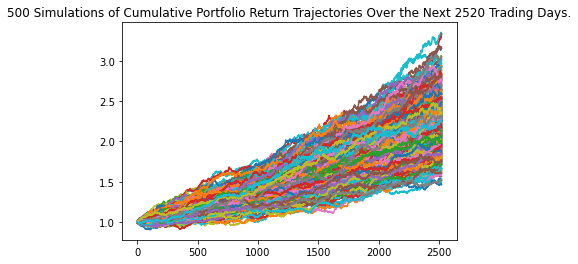

In [48]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_10 = MC_ten_year.plot_simulation()

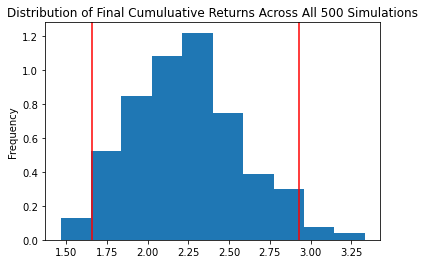

In [49]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_10 = MC_ten_year.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats_10 = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(stats_10)

count           500.000000
mean              2.236680
std               0.336748
min               1.464126
25%               1.995673
50%               2.236344
75%               2.446272
max               3.333725
95% CI Lower      1.656551
95% CI Upper      2.931301
Name: 2520, dtype: float64


In [51]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(stats_10[8]*initial_investment,2)
ci_upper_ten = round(stats_10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $33131.03 and $58626.02
